In [ ]:
# !pip install --upgrade jupyter_http_over_ws>=0.0.7 && \
#   jupyter serverextension enable --py jupyter_http_over_ws

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yashmori09","key":"1c8b827a9c0e190cf5b0d011eb774e87"}'}

In [4]:
!pip install -q kaggle

In [5]:
!mkdir -p ~/.kaggle

In [6]:
!cp kaggle.json ~/.kaggle/

In [8]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!mkdir vehicle_detect

In [9]:
%cd vehicle_detect

/content/vehicle_detect


In [10]:
!kaggle datasets list -s Vehicle-Detection-Image-Set

ref                                                               title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
brsdincer/vehicle-detection-image-set                             Vehicle Detection Image Set                         119MB  2021-05-09 17:54:02           5429        106  0.875            
dataclusterlabs/indian-vehicle-dataset                            Indian Vehicle Dataset                                2GB  2021-12-22 12:36:18           1982         34  0.875            
rifat963/dhakaai-dhaka-based-traffic-detection-dataset            Dhaka-AI                                              1GB  2020-11-30 15:06:13            690         23  0.75             
dataclusterlabs/small-vehicle-images-far-vehicle-d

In [11]:
!kaggle datasets download brsdincer/vehicle-detection-image-set

 96% 114M/119M [00:00<00:00, 145MB/s] 
100% 119M/119M [00:00<00:00, 144MB/s]


In [12]:
!unzip vehicle-detection-image-set.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/vehicles/4414.png  
  inflating: data/vehicles/4415.png  
  inflating: data/vehicles/4416.png  
  inflating: data/vehicles/4417.png  
  inflating: data/vehicles/4418.png  
  inflating: data/vehicles/4419.png  
  inflating: data/vehicles/442.png   
  inflating: data/vehicles/4420.png  
  inflating: data/vehicles/4421.png  
  inflating: data/vehicles/4422.png  
  inflating: data/vehicles/4423.png  
  inflating: data/vehicles/4424.png  
  inflating: data/vehicles/4425.png  
  inflating: data/vehicles/4426.png  
  inflating: data/vehicles/4427.png  
  inflating: data/vehicles/4428.png  
  inflating: data/vehicles/4429.png  
  inflating: data/vehicles/443.png   
  inflating: data/vehicles/4430.png  
  inflating: data/vehicles/4431.png  
  inflating: data/vehicles/4432.png  
  inflating: data/vehicles/4433.png  
  inflating: data/vehicles/4434.png  
  inflating: data/vehicles/4435.png  
  inflating: data/vehicles/4436.png  

In [13]:
import numpy as np 
import pandas as pd
import os

In [14]:
from glob import glob
  
non_vehicles=glob("/content/vehicle_detect/data/non-vehicles/*")
print(len(non_vehicles))
vehicles = glob("/content/vehicle_detect/data/vehicles/*")
len(vehicles)

8968


8792

In [15]:
import cv2
from keras.utils import img_to_array

In [16]:
def convert_image_arry(image_path):
  try:
    image = cv2.imread(image_path)
    if image is not None:
      image = cv2.resize(image,(64,64))
      return(img_to_array(image))
    else:
      return np.array([])
  except Exception as e:
    print("Error",e)

In [17]:
path='/content/vehicle_detect/data'
root_dir=os.listdir(path)
root_dir

['vehicles', 'non-vehicles']

In [18]:
image_list,image_label=[],[]
temp=2
for dir in root_dir:
  new_list=os.listdir(path+'/'+dir)
  temp-=1
  for i in new_list:
    img_path=path+'/'+dir+'/'+i
    image_list.append(convert_image_arry(img_path))
    image_label.append(temp)
print(image_label)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [19]:
print(image_list[0])

[[[ 43.  51.  40.]
  [ 43.  50.  37.]
  [ 47.  51.  41.]
  ...
  [ 38.  42.  44.]
  [ 42.  46.  48.]
  [ 43.  47.  48.]]

 [[ 43.  51.  40.]
  [ 43.  50.  37.]
  [ 47.  51.  41.]
  ...
  [ 28.  32.  32.]
  [ 35.  40.  40.]
  [ 41.  46.  45.]]

 [[ 44.  51.  40.]
  [ 44.  50.  38.]
  [ 48.  52.  42.]
  ...
  [ 50.  53.  64.]
  [ 33.  35.  49.]
  [ 40.  40.  55.]]

 ...

 [[ 85. 108. 106.]
  [ 97. 112. 121.]
  [ 98. 110. 120.]
  ...
  [ 87.  97. 100.]
  [ 83.  94.  97.]
  [ 86.  95. 101.]]

 [[ 86. 106. 105.]
  [ 96. 113. 117.]
  [ 96. 111. 116.]
  ...
  [ 86.  98. 100.]
  [ 85.  97.  99.]
  [ 88.  97. 101.]]

 [[ 93. 108. 110.]
  [ 91. 111. 111.]
  [ 92. 112. 111.]
  ...
  [ 83.  98.  98.]
  [ 87. 100. 101.]
  [ 87.  98.  98.]]]


In [20]:
norm_image_list=np.array(image_list,dtype=np.float16)/255.0

In [21]:
norm_image_list=norm_image_list.reshape(-1,64,64,3)

In [22]:
norm_image_list.shape

(17760, 64, 64, 3)

In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(norm_image_list, image_label, random_state = 0)


In [24]:
from keras.utils import img_to_array, array_to_img, to_categorical
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.optimizers import Adam

In [25]:
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)


In [26]:
from keras.models import Sequential

In [27]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=(64,64,3), activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(5,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 21, 21, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 32)         0

In [29]:
model.compile(loss='binary_crossentropy',optimizer=Adam(0.001), metrics=['accuracy'])

In [30]:
hist=model.fit(xtrain,ytrain,epochs=6,validation_split=0.2,batch_size=32)

Epoch 1/6
333/333 [==============================] - 5s 7ms/step - loss: 0.3518 - accuracy: 0.8509 - val_loss: 0.1479 - val_accuracy: 0.9471
Epoch 2/6
333/333 [==============================] - 2s 6ms/step - loss: 0.1074 - accuracy: 0.9624 - val_loss: 0.0566 - val_accuracy: 0.9827
Epoch 3/6
333/333 [==============================] - 2s 7ms/step - loss: 0.0755 - accuracy: 0.9729 - val_loss: 0.0541 - val_accuracy: 0.9835
Epoch 4/6
333/333 [==============================] - 2s 6ms/step - loss: 0.0530 - accuracy: 0.9817 - val_loss: 0.0535 - val_accuracy: 0.9831
Epoch 5/6
333/333 [==============================] - 2s 6ms/step - loss: 0.0376 - accuracy: 0.9872 - val_loss: 0.0626 - val_accuracy: 0.9775
Epoch 6/6
333/333 [==============================] - 2s 5ms/step - loss: 0.0302 - accuracy: 0.9894 - val_loss: 0.0418 - val_accuracy: 0.9865


In [31]:
model.save('vehicle_detect.h5')

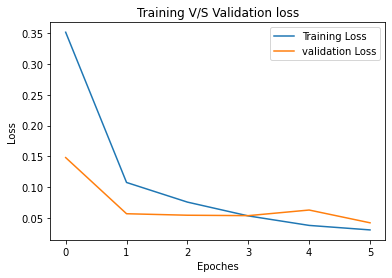

In [32]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='validation Loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.title("Training V/S Validation loss")
plt.legend()

In [33]:
model.evaluate(xtest,ytest)

139/139 [==============================] - 1s 4ms/step - loss: 0.0534 - accuracy: 0.9831


[0.053378865122795105, 0.9831081032752991]

In [34]:
y_pred=model.predict(xtest)

139/139 [==============================] - 0s 2ms/step


In [35]:
ypred=np.argmax(y_pred,axis=1)
yactual=np.argmax(ytest,axis=1)

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yactual, ypred)

array([[2200,   67],
       [   8, 2165]])